In [1]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')


In [3]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
full_df = pd.concat([train_df, test_df]).reset_index(
    drop=True).drop(['PassengerId'], axis=1)

In [6]:
full_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 112.6+ KB


In [8]:
miss_data = full_df[['Age', 'Fare', 'Cabin', 'Embarked']]

In [9]:
miss_data.value_counts()

Age    Fare      Cabin    Embarked
36.00  120.0000  B96 B98  S           2
25.00  55.4417   E50      C           2
50.00  211.5000  C80      C           2
24.00  69.3000   B35      C           2
0.92   151.5500  C22 C26  S           1
                                     ..
30.00  151.5500  C22 C26  S           1
       164.8667  C7       S           1
31.00  28.5375   C53      C           1
       50.4958   A24      S           1
80.00  30.0000   A23      S           1
Length: 266, dtype: int64

In [10]:
miss_data.describe()

,Age,Fare
count,1046.000000,1308.000000
mean,29.881138,33.295479
std,14.413493,51.758668
min,0.170000,0.000000
25%,21.000000,7.895800
50%,28.000000,14.454200
75%,39.000000,31.275000
max,80.000000,512.329200


In [11]:
print(f'''
    Count of Age missings: {miss_data.Age.isna().sum()} or {round(miss_data.Age.isna().sum() * 100 / len(miss_data), 2)} %
    Count of Fare missings: {miss_data.Fare.isna().sum()} or {round(miss_data.Fare.isna().sum() * 100 / len(miss_data), 2)}
    Count of Cabin missings: {miss_data.Cabin.isna().sum()} or {round(miss_data.Cabin.isna().sum() * 100 / len(miss_data), 2)} %
    Count of Embarked missings: {miss_data.Embarked.isna().sum()} or {round(miss_data.Embarked.isna().sum() * 100 / len(miss_data), 2)} %
    ''')


    Count of Age missings: 263 or 20.09 %
    Count of Fare missings: 1 or 0.08
    Count of Cabin missings: 1014 or 77.46 %
    Count of Embarked missings: 2 or 0.15 %
    


In [12]:
full_df[full_df.Fare == 0]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,0.0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,0.0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,1.0,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,0.0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,0.0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,0.0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,0.0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,0.0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,0.0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [13]:
full_df[full_df.Fare == 0].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,15.000000,17.000000,8.000000,17.0,17.0,17.0
mean,0.066667,1.823529,36.875000,0.0,0.0,0.0
std,0.258199,0.808957,10.494046,0.0,0.0,0.0
min,0.000000,1.000000,19.000000,0.0,0.0,0.0
25%,0.000000,1.000000,33.250000,0.0,0.0,0.0
50%,0.000000,2.000000,38.500000,0.0,0.0,0.0
75%,0.000000,2.000000,42.250000,0.0,0.0,0.0
max,1.000000,3.000000,49.000000,0.0,0.0,0.0


In [14]:
full_df.Embarked.fillna(full_df.Embarked.mode()[0], inplace = True)
full_df.Fare.fillna(full_df.Fare.mode()[0], inplace = True)
full_df.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

將Cabin、Ticket刪除缺失的值

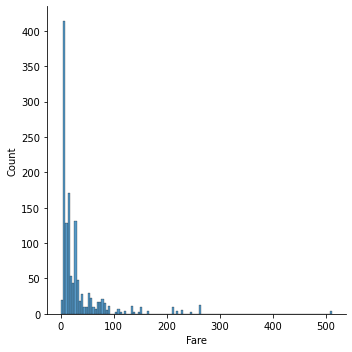

In [15]:
sns.displot(data=full_df, x='Fare')

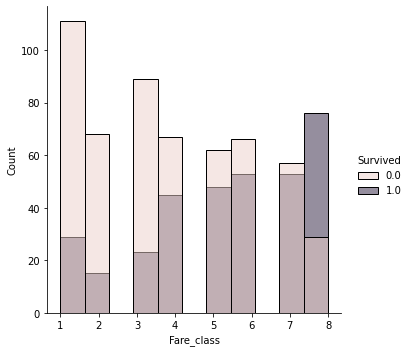

In [16]:
Fare_class = pd.qcut(full_df.Fare, q=8, labels=[1, 2, 3, 4, 5, 6, 7, 8])
full_df['Fare_class'] = Fare_class.astype(int)
sns.displot(data=full_df, x='Fare_class', hue='Survived')

In [17]:
full_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_class
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.322280
Pclass,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558740,-0.723707
Age,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.177286,0.179247
SibSp,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160388,0.343066
Parch,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221668,0.341250
Fare,0.257307,-0.558740,0.177286,0.160388,0.221668,1.000000,0.620702
Fare_class,0.322280,-0.723707,0.179247,0.343066,0.341250,0.620702,1.000000


In [18]:
full_df['Title']=0
full_df['Title']=full_df.Name.str.extract('([A-Za-z]+)\.') 
full_df['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col',
                         'Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [19]:
full_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_class,Title
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,Mr
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,8,Mrs
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,3,Miss
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,7,Mrs
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,3,Mr
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S,3,Mr
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,8,Dona
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,1,Mr
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S,3,Mr


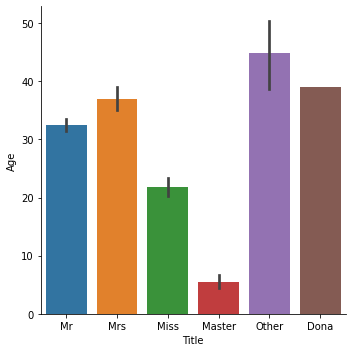

In [20]:
sns.catplot(data=full_df, y='Age', x='Title', kind='bar')

In [21]:
full_df.isna().sum()

Survived      418
Pclass          0
Name            0
Sex             0
Age           263
SibSp           0
Parch           0
Fare            0
Embarked        0
Fare_class      0
Title           0
dtype: int64

In [22]:
full_df.drop(['Age'], axis=1).corrwith(other=full_df.Age)

Survived     -0.077221
Pclass       -0.408106
SibSp        -0.243699
Parch        -0.150917
Fare          0.177286
Fare_class    0.179247
dtype: float64

In [23]:
full_df.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

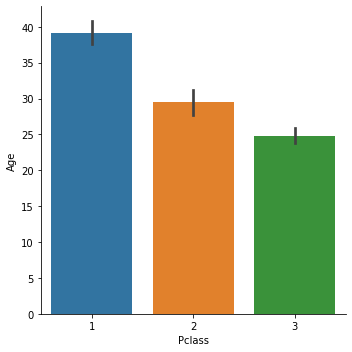

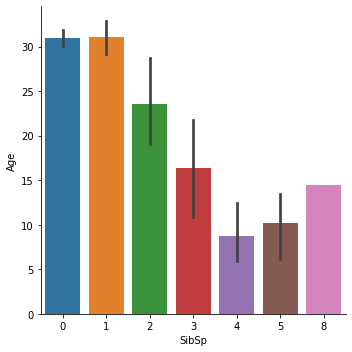

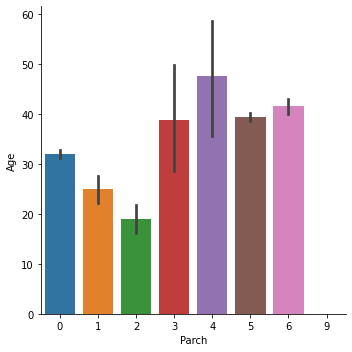

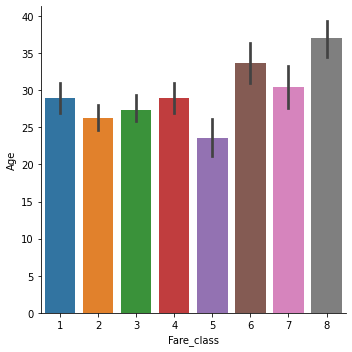

In [24]:
sns.catplot(data=full_df, y='Age', x='Pclass', kind='bar')
sns.catplot(data=full_df, y='Age', x='SibSp', kind='bar')
sns.catplot(data=full_df, y='Age', x='Parch', kind='bar')
sns.catplot(data=full_df, y='Age', x='Fare_class', kind='bar')


In [25]:
le = LabelEncoder()
categorical_features = ['Sex', 'Title', 'Embarked']
full_df_enc = full_df.copy()
for feature  in categorical_features: 
    feature_enc = le.fit_transform(full_df[feature])
    full_df_enc[feature] = pd.Series(feature_enc.reshape(-1,))


In [26]:
full_df_enc

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_class,Title
0,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,1,3
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,8,4
2,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,3,2
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,7,4
4,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",1,NaN,0,0,8.0500,2,3,3
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,108.9000,0,8,0
1306,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,7.2500,2,1,3
1307,NaN,3,"Ware, Mr. Frederick",1,NaN,0,0,8.0500,2,3,3


<AxesSubplot:>

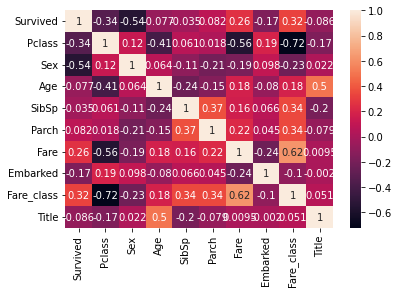

In [27]:
sns.heatmap(data=full_df_enc.corr(), annot=True)

<AxesSubplot:>

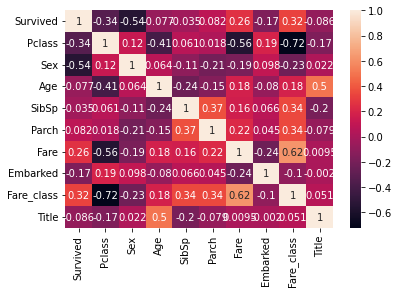

In [28]:
sns.heatmap(data=full_df_enc.corr(), annot=True)

In [29]:
full_df_enc.loc[full_df_enc['Title'] == 0, 'Title'] = 4

In [30]:
full_df_enc.drop(['Age'], axis=1).corrwith(other=full_df_enc.Age)

Survived     -0.077221
Pclass       -0.408106
Sex           0.063645
SibSp        -0.243699
Parch        -0.150917
Fare          0.177286
Embarked     -0.080195
Fare_class    0.179247
Title         0.505016
dtype: float64

In [31]:
X = full_df_enc[full_df_enc['Age'].notna()].drop(['Age', 'Name', 'Survived'], axis=1)
y = full_df_enc[full_df_enc['Age'].notna()].Age
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=X['Title'])

In [32]:
regr_3 = GradientBoostingRegressor(random_state=0, max_depth=4, n_estimators=1200, 
                                   learning_rate=0.018, loss='huber', warm_start=True, verbose=1)

regressors = [regr_3]
for regressor in regressors:
    pipe = Pipeline([('scaler', StandardScaler()), ('regr', regressor)])
    pipe.fit(X_train, y_train)

    print(regressor)
    print(pipe.score(X_train, y_train))
    print(f' test_score: {pipe.score(X_test, y_test)}')
    


      Iter       Train Loss   Remaining Time 
         1         102.8716            8.29s
         2         100.9939            8.30s
         3          99.1788            8.20s
         4          97.4216            8.13s
         5          95.7196            8.05s
         6          94.0732            8.00s
         7          92.4790            8.09s
         8          90.9349            8.05s
         9          89.4405            8.09s
        10          88.0954            8.06s
        20          76.4631            8.16s
        30          67.7350            7.98s
        40          61.8180            7.85s
        50          58.0178            7.70s
        60          55.2027            7.59s
        70          53.2457            7.54s
        80          51.7856            7.45s
        90          50.5997            7.39s
       100          49.8065            7.30s
       200          43.7665            6.47s
       300          40.2002            5.75s
       40

In [33]:
pd.Series(pipe.predict(X_test)-y_test).describe()

count    105.000000
mean       1.116978
std        8.181684
min      -19.750954
25%       -4.098607
50%        0.852223
75%        6.851564
max       26.049664
Name: Age, dtype: float64

In [34]:
full_df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      1309 non-null   int64  
 2   Name        1309 non-null   object 
 3   Sex         1309 non-null   int64  
 4   Age         1046 non-null   float64
 5   SibSp       1309 non-null   int64  
 6   Parch       1309 non-null   int64  
 7   Fare        1309 non-null   float64
 8   Embarked    1309 non-null   int64  
 9   Fare_class  1309 non-null   int64  
 10  Title       1309 non-null   int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 112.6+ KB


In [35]:
predicted_age = pipe.predict(full_df_enc[full_df_enc['Age'].isna()].drop(['Name', 'Survived', 'Age'], axis=1))

In [36]:
full_df_enc.loc[full_df_enc['Age'].isna(), 'Age'] = np.round(predicted_age, 1)

<AxesSubplot:>

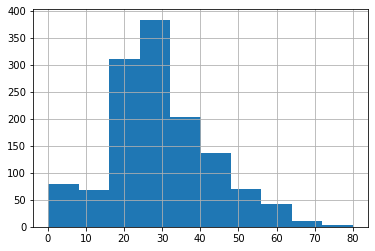

In [37]:
full_df_enc.Age.hist()

<AxesSubplot:>

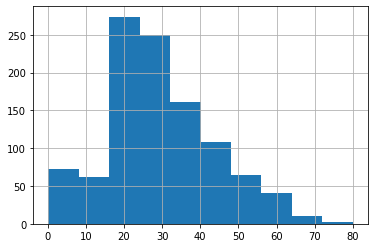

In [38]:
full_df.Age.hist()

In [39]:
X_sur = full_df_enc.loc[full_df_enc.Survived.notna()].drop(['Survived', 'Name'], axis=1)  
y_sur = np.array(full_df_enc.loc[full_df_enc.Survived.notna()]['Survived'].astype(int))
X_train_sur, X_test_sur, y_train_sur, y_test_sur = train_test_split(X_sur, y_sur, test_size=0.4, random_state = 0, stratify=X_sur['Title'])

In [40]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, IsolationForest, RandomForestClassifier, RandomTreesEmbedding, StackingClassifier
from sklearn.ensemble import VotingClassifier
# from hpbandster_sklearn import HpBandSterSearchCV

In [41]:

classifier_10 = GradientBoostingClassifier(random_state=0, criterion='friedman_mse',
                                           learning_rate=0.18,
                                           loss='exponential',
                                           max_depth=5,
                                           max_leaf_nodes=30,
                                           min_samples_leaf=3,
                                           min_samples_split=20,
                                           subsample=0.9736842105263157,
                                           n_estimators=22)


In [42]:
classifiers = [classifier_10]
for classifier in classifiers:
    classifier.fit(X_train_sur, y_train_sur)
    print(classifier)
    print(f'train score: {classifier.score(X_train_sur, y_train_sur)}')
    print(f'test score: {classifier.score(X_test_sur, y_test_sur)}')

GradientBoostingClassifier(learning_rate=0.18, loss='exponential', max_depth=5,
                           max_leaf_nodes=30, min_samples_leaf=3,
                           min_samples_split=20, n_estimators=22,
                           random_state=0, subsample=0.9736842105263157)
train score: 0.9044943820224719
test score: 0.8739495798319328


In [43]:
confusion_matrix(y_test_sur, classifier_10.predict(X_test_sur))

array([[221,  17],
       [ 28,  91]])

In [44]:
predicted_survived = classifier_10.predict(full_df_enc.loc[full_df_enc.Survived.isna()].drop(['Name', 'Survived'], axis=1))

In [45]:
predicted_survived

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [46]:
test_df['Survived'] = predicted_survived.astype(int)

In [47]:
submission = pd.DataFrame(index=[test_df.PassengerId, test_df.Survived])

In [48]:
submission.to_csv('submission.csv')